In [6]:
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython import display

# SIMD architektúra processzorokból

- Az SIMD lényege, hogy minden elem ugyanazt csinálja, ezesetben minden processzor.
- Egy maximum számoló processzor tömböt szimulálunk, ahol minden processzor (lila elemek a sárga környezetben) a szomszédos sárga négyzeteket látja.


**A OperationMax(LocalMem, t) fv-t kell megírni:**

A localMem-be egy 3x3-as mátrix érkezik. Ezt a tömböt módosíthatjuk, majd visszadjuk. A középső elemet (a processzort) kivéve mindegyik cella több processzorhoz is tartozik, így véletlen sorrendben íródnak felül, ha módosítjuk őket.

Úgy hozzuk létre a maximum keresést, hogy mindegyik processzor a környezetében található legnagyobb elemet kiírja egy jól meghatározott helyre, például a bal felső sarokba, így a maximum érték végig fog terjedni a processzor tömbön, míg meg nem érkezik a legbalfelsőbb sarokba.

In [7]:
def OperationMax(LocalMem, t):
    LocalMem2 = 1*LocalMem
    Max = LocalMem2[0, 0]
    for i in range(0,3):
        for j in range(0,3):
            if LocalMem2[i,j] > Max:
                Max = LocalMem2[i,j]
                
    LocalMem2[0,0] = Max
    return LocalMem2

Hozzuk létre a processzortömböt, illetve a véletlenszerűen generált adattönböt.

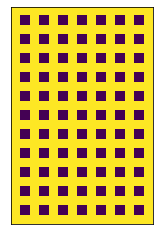

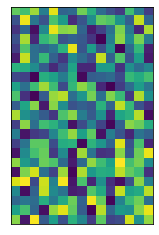

In [8]:
# number of processors - given as the half length (radius) of each side
Sx=11
Sy=7

# create the array
ArraySize=[2*Sx+1,2*Sy+1]

# run long enough to reach any element during propagation
Time=(Sx+Sy)*2

# This is the perimeter, it is enough to distribute an
# element around the perimeter
# we need the diagonal to ensure that the information can reach the corners
# half the diagonal if we read out the element in the middle
deltat=1

Array=np.random.random(ArraySize)*255 #random array containign values
#black values are high and white values are low

Processors=np.ones(ArraySize)
for a in range(Sx):
	for b in range(Sy):
		Processors[2*a+1,2*b+1]=0.0
    #white spots are processors, everyone sees a 3x3 region

#show processors
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
ax1.grid(False)
plt.xticks([])
plt.yticks([])
ax1.imshow(Processors)

fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
ax2.grid(False)
plt.xticks([])
plt.yticks([])
ax2.imshow(Array, clim=(0.0, 255.0))

Futtassuk le a szimulációt.

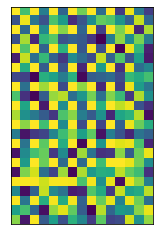

254.66658793432066


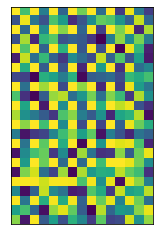

In [9]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
ax1.grid(False)
plt.xticks([])
plt.yticks([])
ax1.imshow(Array, clim=(0.0, 255.0))
display.clear_output(wait=True)
display.display(plt.gcf())
time.sleep(1)

# SIMD architecture, same operation runs on all processors
# The goal is to find the max element.

for t in range(10):
    #this is just a simulation; so sequential processing will happen
    #permutating the order of execution of the processors:
    XCoords, YCoords = np.meshgrid(range(Sx),range(Sy))
    Order=np.random.permutation(range(Sx*Sy))
    XCoords=np.ndarray.flatten(XCoords)[Order]
    YCoords=np.ndarray.flatten(YCoords)[Order]
    # iterate through all the cells
    for i in range(len(XCoords)):
        a=XCoords[i]
        b=YCoords[i]
        #get neighborhood
        LocalMem = Array[(2*a):(2*a+3),(2*b):(2*b+3)]
        #execute the operation on all elements:
        LocalMem = OperationMax(LocalMem,t)
        Array[(2*a):(2*a+3),(2*b):(2*b+3)] = LocalMem
    ax1.imshow(Array, clim=(0.0, 255.0))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1)
print(Array[0,0])

Ellenőrizzük, hogy jó eredményt kaptunk-e:

In [10]:
np.amax(Array) #check the maximum value, this is what we should find, and can with a single processor

254.66658793432066